499 499
[5.67942815e-01 6.40702769e-01 9.74769449e-01 1.26493581e+00
 1.46054845e+00 2.00218936e+00 2.14959881e+00 2.38360199e+00
 2.56485201e+00 2.64590451e+00 3.06569638e+00 3.40418543e+00
 3.84154190e+00 4.38093221e+00 4.55706207e+00 5.46658339e+00
 6.17540110e+00 6.76351190e+00 7.14663102e+00 7.25611727e+00
 7.54445008e+00 8.83405792e+00 8.98929078e+00 1.00069741e+01
 1.08983261e+01 1.14113436e+01 1.20437357e+01 1.25696548e+01
 1.30050697e+01 1.34214599e+01 1.37889536e+01 1.44951616e+01
 1.51971426e+01 1.54956131e+01 1.59326103e+01 1.70816471e+01
 1.84981546e+01 1.91168960e+01 2.02017721e+01 2.14514362e+01
 2.19437868e+01 2.34810130e+01 2.41332773e+01 2.50312862e+01
 2.58824309e+01 2.74916198e+01 2.90753619e+01 3.09328377e+01
 3.11229306e+01 3.22345975e+01 3.28029585e+01 3.46263163e+01
 3.64046634e+01 3.79640701e+01 3.80916575e+01 3.93314853e+01
 4.21263421e+01 4.24882515e+01 4.34074550e+01 4.42625302e+01
 4.66267865e+01 4.72485056e+01 4.82964671e+01 4.91928641e+01
 5.18591624e+01 

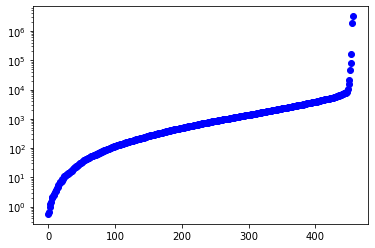

In [63]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def chr_interaction_pick(data,pos,size,i,j):#输入总的数据集，包括互作矩阵，各个染色体位置、长度，想要比对的chr_i,chr_j
    return data['hic'][pos[i]:pos[i]+size[i],pos[j]:pos[j]+size[j]]

def deal_diff_dataset(data):#data是load的npz数据,获得数据集的染色体位置
    pos = np.zeros(25,dtype = np.int64) #对应1-22号染色体和X，Y染色体位置，最后一位是Y染色体终止位
    for i in range(1,25): #找出不同染色体区域
        if i<23:        
            pos[i-1] = np.where(data['col'] == 'chr'+str(i)+'-0')[0][0]
        else:
            if i == 23:
                pos[i-1] = np.where(data['col'] == 'chrX-0')[0][0]
            else:
                pos[i-1] = np.where(data['col'] == 'chrY-0')[0][0]
    pos[-1] = 6206 #Y终止位
    diff = np.diff(pos) #每条染色体的矩阵规模
    return pos,diff

def spectral(S):#输入对称方阵
    eigenvalue,eigenvector = np.linalg.eigh(S,UPLO='L')
    x= eigenvalue.real
    y= eigenvalue.imag
    z = abs(eigenvalue)
    
i=0
j=1
K562_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Aiden_K562_500000.npz')
PANC1_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Dekker_PANC1_500000.npz')
pos,diff = deal_diff_dataset(K562_data)
M = chr_interaction_pick(K562_data,pos,diff,i,j)
MMT = np.dot(M,M.T)
MTM = np.dot(M.T,M)
eigenvalue,eigenvector = np.linalg.eigh(MMT,UPLO='L')
print(eigenvalue.real.size,np.ma.ravel(eigenvalue.imag).size)
x= eigenvalue.real
y= eigenvalue.imag
z = abs(eigenvalue)
print(z[z>0.1])
plt.semilogy(z[z>0.1],'bo')
# print(eigenvector[1].real<0.2)
# plt.plot(eigenvector[1].real[eigenvector[1].real<0.2],'bo')


In [5]:
a = np.array([[1,2],[3,4]])
b = a[0:1,1:2]
print(b)

[[2]]


In [99]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

K562_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Aiden_K562_500000.npz')
PANC1_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Dekker_PANC1_500000.npz')
print(K562_data['col'][-2:])#6207 最后一位是M可以忽略
print(PANC1_data['col'])
# pos = np.zeros(25,dtype = np.int64) #对应1-22号染色体和X，Y染色体位置，最后一位是Y染色体终止位
# for i in range(1,25): #找出不同染色体区域
#     if i<23:        
#         pos[i-1] = np.where(K562_data['col'] == 'chr'+str(i)+'-0')[0][0]
#     else:
#         if i == 23:
#             pos[i-1] = np.where(K562_data['col'] == 'chrX-0')[0][0]
#         else:
#             pos[i-1] = np.where(K562_data['col'] == 'chrY-0')[0][0]
# pos[-1] = 6206 #Y终止位
# diff = np.diff(pos) #每条染色体的矩阵规模
pos,diff = deal_diff_dataset(PANC1_data)
print(pos)
print(diff)
print(np.sum(diff))
import pickle
with open('/home/qyang/Documents/projects/HiC_translocation/Data/transloc_table.pkl','rb') as f:
   full_table = pickle.load(f) 
full_table[0:16]

['chrY-59000000' 'chrM-0']
['chr1-0' 'chr1-500000' 'chr1-1000000' ... 'chrY-58500000' 'chrY-59000000'
 'chrM-0']
[   0  499  986 1383 1766 2128 2471 2790 3083 3366 3638 3909 4177 4408
 4623 4829 5010 5173 5330 5449 5576 5673 5776 6087 6206]
[499 487 397 383 362 343 319 293 283 272 271 268 231 215 206 181 163 157
 119 127  97 103 311 119]
6206


,name,file,chri,chrj,boxes,objs,clear
0,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr1,chr20,"[[52, 120, 215, 244]]",[1],[1]
1,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr3,chr10,"[[0, 170, 0, 96]]",[1],[1]
2,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr3,chr18,"[[0, 43, 271, 390]]",[1],[1]
3,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr9,chr13,"[[0, 192, 53, 56], [0, 192, 64, 77]]","[1, 2]",[1]
4,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr12,chr21,"[[28, 73, 45, 262]]",[1],[1]
5,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr3,chr20,"[[0, 52, 139, 390]]",[1],[1]
6,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr8,chr11,"[[0, 179, 246, 287]]",[1],[1]
7,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr15,chr19,"[[44, 113, 0, 32], [44, 113, 60, 162]]","[1, 2]","[1, 1]"
8,CAKI2,/data/HiCAT/hic_mats/Dekker_CAKI2_500000.npz,chr1,chr15,"[[138, 158, 0, 138]]",[1],[1]
9,CAKI2,/data/HiCAT/hic_mats/Dekker_CAKI2_500000.npz,chr2,chr3,"[[257, 390, 0, 460], [303, 353, 321, 405]]","[1, 2]","[1, 1]"


M>1000:(array([219]), array([60]))

Size of X1:(499, 499).
Size of X2:(127, 127)

<BarContainer object of 42 artists>
<BarContainer object of 9 artists>


4.496773073706468

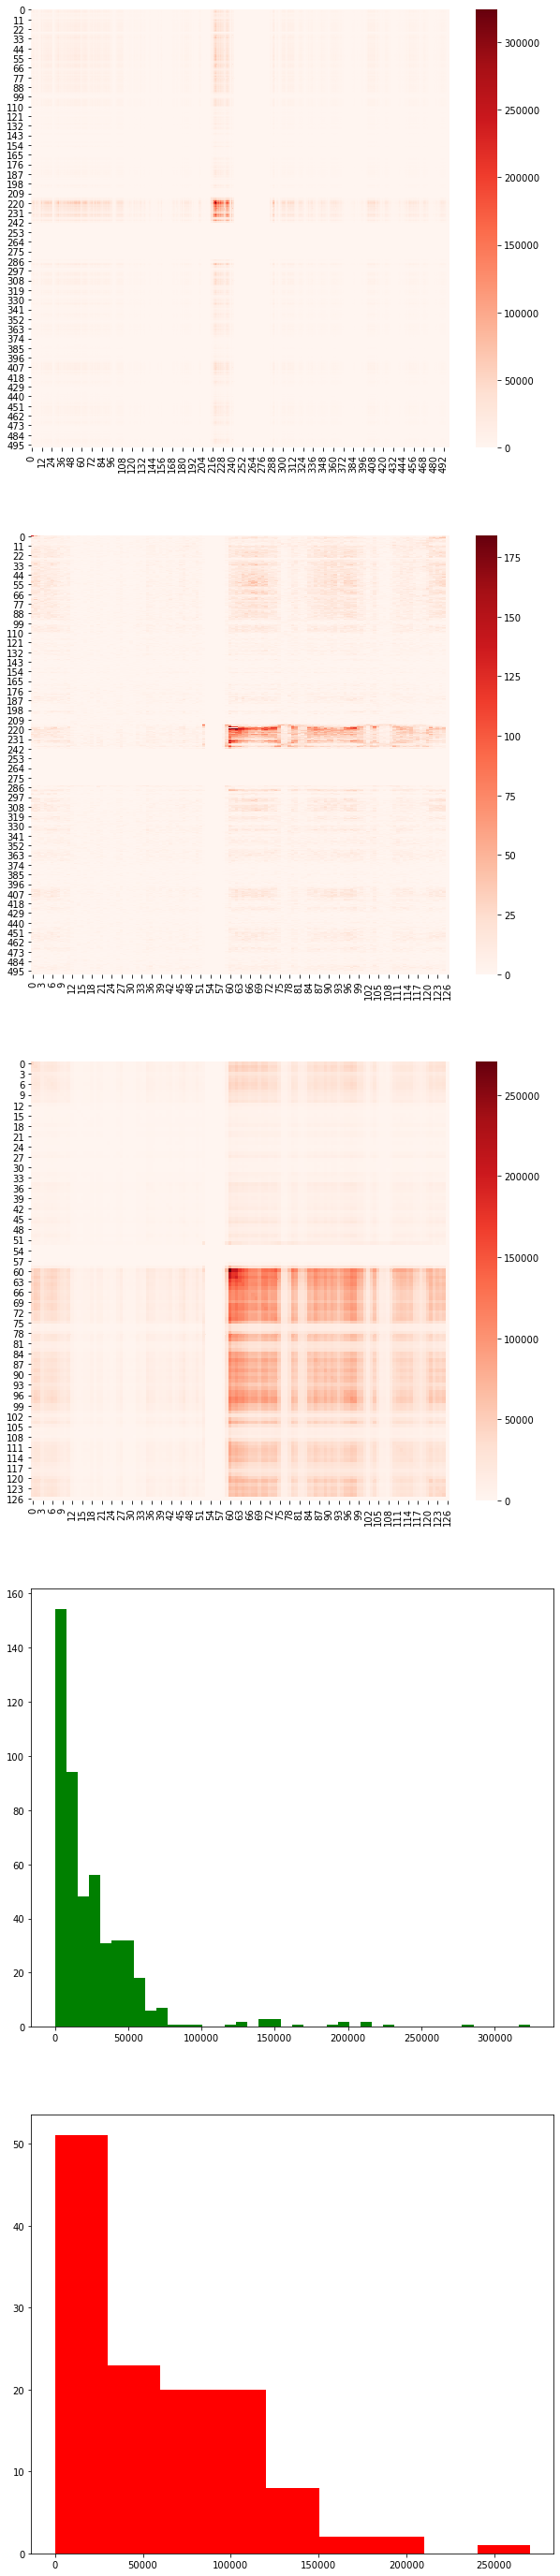

In [105]:
i=0
j=19

M = chr_interaction_pick(PANC1_data,pos,diff,i,j)
M = chr_interaction_pick(K562_data,pos,diff,i,j)
# print(diff[i],diff[j])
# M[M>2000] = 2000
# degree_L = np.sum(M,axis=1)
# # print('\n degree:',degree_L,'\n degree = 0: ',np.where(degree_L ==0)[0])
# M = np.delete(M,np.where(degree_L ==0)[0],axis = 0)
# degree_L = np.sum(M,axis=0)
# # print('\n degree:',degree_L,'\n degree = 0: ',np.where(degree_L ==0)[0])
# M = np.delete(M,np.where(degree_L ==0)[0],axis = 1)
# print(M.shape)
print("M>1000:{0}\n".format(np.where(M==np.amax(M))))
M[np.where(M==np.amax(M))] = 0
M[np.where(M==np.amax(M))] = 0
M[np.where(M==np.amax(M))] = 0

f,axs = plt.subplots(5,1,figsize=(10,50))
X1 = np.dot(M,M.T)
X2 = np.dot(M.T,M)
i = 0 
print("Size of X1:{0}.\nSize of X2:{1}\n".format(X1.shape,X2.shape))
sns.heatmap(X1,ax = axs[i],cmap="Reds")
i = i+1 
sns.heatmap(M,ax = axs[i],cmap="Reds")
i = i + 1
sns.heatmap(X2,ax = axs[i],cmap="Reds")
i = i + 1

n1,bins1,patches1 = axs[i].hist(np.amax(X1,1),bins = 'auto',facecolor='g')
i = i + 1
n2,bins2,patches2 = axs[i].hist(np.amax(X2,1),bins = 'auto',facecolor='r')
i = i + 1
print(patches1)
print(patches2)

H1,bin_edges1 = np.histogram(np.amax(X1,1),bins='auto',density = True)
H2,bin_edges2 = np.histogram(np.amax(X2,1),bins='auto',density = True)
np.dot(H1,bin_edges1[0:-1])+np.dot(H2,bin_edges2[0:-1])


In [47]:
x = np.array([1,2,3,4])
print((x[0:-1]+x[1:])/2)

[1.5 2.5 3.5]


[ 1.15207973e+01  6.76725430e-16 -5.20797289e-01  4.00000000e+00
  2.22044605e-16  5.81304459e-33  3.42113883e-49]
[[-3.23528067e-01 -7.07106781e-01  6.28752407e-01  1.41175157e-18
  -3.83876444e-03  3.83079899e-04 -2.67871876e-20]
 [-3.23528067e-01  7.07106781e-01  6.28752407e-01  5.39032417e-19
   3.83876444e-03 -3.83079899e-04  2.07762701e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.07106781e-01
  -7.07096361e-01  1.05022502e-01 -7.34378775e-18]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.07106781e-01
   7.07096361e-01 -1.05022502e-01  2.38573170e-18]
 [-5.13374191e-01 -2.24849326e-16 -2.64159561e-01 -5.78990933e-18
   4.02157421e-18  8.07440505e-01  8.78437426e-18]
 [-5.13374191e-01 -2.24849326e-16 -2.64159561e-01  3.81901023e-18
  -5.58720375e-18 -4.03720253e-01 -7.07106781e-01]
 [-5.13374191e-01 -2.24849326e-16 -2.64159561e-01  3.81901023e-18
  -5.58720375e-18 -4.03720253e-01  7.07106781e-01]]


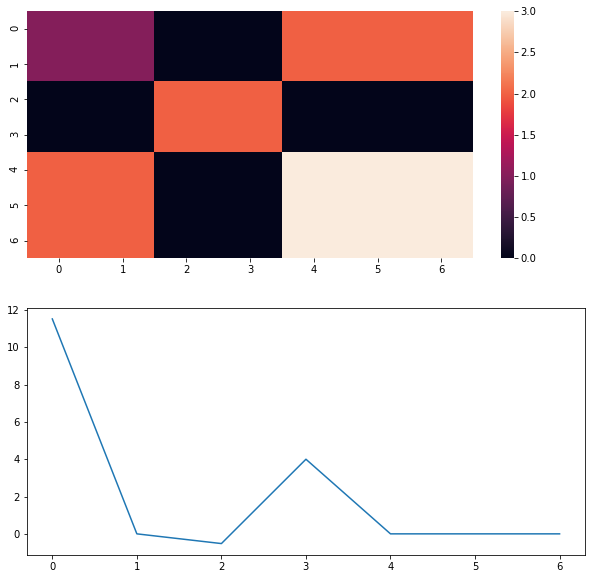

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

A = np.array([[1,1,0,0,2,2,2],[1,1,0,0,2,2,2],[0,0,2,2,0,0,0],[0,0,2,2,0,0,0],[2,2,0,0,3,3,3],[2,2,0,0,3,3,3],[2,2,0,0,3,3,3]])
eigenvalue,eigenvector = np.linalg.eig(A)
f,axs = plt.subplots(2,1,figsize=(10,10))
sns.heatmap(A,ax = axs[0])
print(eigenvalue)
print(eigenvector)
axs[1].plot(eigenvalue)